# **Trying Different approaches on Dataset!**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def have_roc(testlabels, y_pred):
  fpr, tpr, thresholds = roc_curve(testlabels, y_pred)
  roc_auc = auc(fpr, tpr)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()


In [3]:
# Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv"

# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/som_data.csv"
urls = []
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv")
# comments.append("1s split")

# #self made data
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/som_data.csv")
# comments.append("self made data")

# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/1ssplit%20combined%20dataset%20CAIDA%202007.csv")
# comments.append("1s split with ")

#new 2s splits
# #filled
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/caida2007/csv/2ssplit%20combined%20dataset%20CAIDA%202007%20filled.csv")
# comments.append("filled 2s split with band")
# #unfilled
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/caida2007/csv/2ssplit%20combined%20dataset%20CAIDA%202007%20unfilled.csv")
# comments.append("unfilled 2s split with band")

# #filled
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/caida2007/csv/2ssplit%20combined%20dataset%20CAIDA%202007%20filled.csv")
# comments.append("filled 2s split without band")
#unfilled
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/caida2007/csv/2ssplit%20combined%20dataset%20CAIDA%202007%20unfilled.csv")
# comments.append("unfilled 2s split without band")

### ids 2017 benign only
##filled
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/isd%202017/ids-2017-benign-Monday-WorkingHours2s%20unlabeled_filled_entropy.csv")
# comments.append("ids 2017 benign only filled")
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/isd%202017/ids-2017-benign-Monday-WorkingHours2s%20unlabeled_filled_entropy.csv")
# comments.append("ids 2017 benign only filled without band")
###unfilled
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/isd%202017/ids-2017-benign-Monday-WorkingHours2s%20unlabeled_unfilled_entropy.csv")
# comments.append("ids 2017 benign only unfilled")
# urls.append("https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/DATASET/isd%202017/ids-2017-benign-Monday-WorkingHours2s%20unlabeled_unfilled_entropy.csv")
# comments.append("ids 2017 benign only unfilled without band")


url = urls[0]

df = pd.read_csv(url)
df.shape


(890, 6)

In [4]:
df

,etpSrcIP,etpSrcP,etpDstP,etpProtocol,totalPacket,label
0,1.000000,-0.0,-0.0,-0.0,0,0
1,1.000000,-0.0,-0.0,-0.0,8,0
2,1.000000,-0.0,-0.0,-0.0,16,0
3,1.000000,-0.0,-0.0,-0.0,24,0
4,1.000000,-0.0,-0.0,-0.0,32,0
...,...,...,...,...,...,...
885,2.846439,-0.0,-0.0,-0.0,1222,0
886,2.846439,-0.0,-0.0,-0.0,1262,0
887,2.846439,-0.0,-0.0,-0.0,1302,0
888,2.846439,-0.0,-0.0,-0.0,1342,0


In [5]:
# Filter rows where any of the specified columns contain 0
rows_to_remove = df[(df['etpSrcP'] == 0) | (df['etpDstP'] == 0) | (df['etpProtocol'] == 0)]

# Remove the filtered rows from the DataFrame
df = df.drop(rows_to_remove.index)

# Display the updated DataFrame
print(df)


     etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
69   1.970951  1.570951  1.570951     0.970951          158      0
70   1.811278  1.936278  1.936278     0.811278          162      0
71   1.591673  2.305958  2.305958     0.591673          174      0
72   1.468996  2.532229  2.532229     0.468996          182      0
73   1.426229  2.620891  2.620891     0.426229          186      0
..        ...       ...       ...          ...          ...    ...
806  4.154982  0.024125  0.024125     0.021993      1137302      0
807  4.154982  0.024125  0.024125     0.021993      1137746      0
808  4.154982  0.024125  0.024125     0.021993      1137786      0
809  4.154982  0.024125  0.024125     0.021993      1137826      0
810  4.154982  0.024125  0.024125     0.021993      1137866      0

[580 rows x 6 columns]


In [6]:
# # Filter rows where any of the specified columns contain 0
# rows_to_remove = df[(df[' src_port_entropy'] == 0) | (df[' dst_port_entropy'] == 0) | (df[' protocol_entropy'] == 0)]

# # Remove the filtered rows from the DataFrame
# df = df.drop(rows_to_remove.index)

# # Display the updated DataFrame
# print(df)


In [7]:
# Display the first few rows of the dataset
print("Dataset loaded successfully. First few rows:")
print(df.head())



Dataset loaded successfully. First few rows:
    etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
69  1.970951  1.570951  1.570951     0.970951          158      0
70  1.811278  1.936278  1.936278     0.811278          162      0
71  1.591673  2.305958  2.305958     0.591673          174      0
72  1.468996  2.532229  2.532229     0.468996          182      0
73  1.426229  2.620891  2.620891     0.426229          186      0


In [8]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())




Checking for missing values:
etpSrcIP       0
etpSrcP        0
etpDstP        0
etpProtocol    0
totalPacket    0
label          0
dtype: int64


In [9]:
# Splitting features and labels
X = df.drop('label', axis=1)  # Features
y = df['label']                # Labels




In [10]:
# # Splitting features and labels
# X = df.drop('label', axis=1)  # Features
# y = df['label']                # Labels




In [11]:
print(X.shape)
print(y.shape)

(580, 5)
(580,)


In [12]:
X

,etpSrcIP,etpSrcP,etpDstP,etpProtocol,totalPacket
69,1.970951,1.570951,1.570951,0.970951,158
70,1.811278,1.936278,1.936278,0.811278,162
71,1.591673,2.305958,2.305958,0.591673,174
72,1.468996,2.532229,2.532229,0.468996,182
73,1.426229,2.620891,2.620891,0.426229,186
...,...,...,...,...,...
806,4.154982,0.024125,0.024125,0.021993,1137302
807,4.154982,0.024125,0.024125,0.021993,1137746
808,4.154982,0.024125,0.024125,0.021993,1137786
809,4.154982,0.024125,0.024125,0.021993,1137826


In [13]:
import numpy as np


# Calculate and store the mean and standard deviation for each dimension, excluding specified columns
mean_std_dict = {}
for col in X.columns:
      mean_std_dict[col] = (X[col].mean(), X[col].std())

# Define the function for normalization using tanh-estimator method, excluding specified columns
def normalize_with_tanh_estimator(data, mean_std_dict):
    normalized_data = pd.DataFrame()
    for col in data.columns:
      mu, sigma = mean_std_dict[col]
      normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
      normalized_data[col] = normalized_col
    return normalized_data

# Normalize the dataset using tanh-estimator method, excluding specified columns
normalized_X = normalize_with_tanh_estimator(X, mean_std_dict)

# Display the first few rows of the normalized dataset
print(normalized_X.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements
X = normalized_X

    etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket
69  0.426566  0.413292  0.532831     0.689370     0.488341
70  0.424561  0.418200  0.547439     0.656141     0.488342
71  0.421806  0.423183  0.562139     0.607884     0.488343
72  0.420270  0.426240  0.571084     0.579906     0.488345
73  0.419735  0.427440  0.574577     0.570020     0.488345


In [14]:
# data = X

# from sklearn.preprocessing import MinMaxScaler, StandardScaler


# # compute required values
# scaler = StandardScaler()
# model = scaler.fit(data)
# scaled_data = model.transform(data)

# X = scaled_data

In [15]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:

# Display the shape of train and test sets
print("\nShape of train set:", X_train_scaled.shape)
print("Shape of test set:", X_test_scaled.shape)


Shape of train set: (464, 5)
Shape of test set: (116, 5)


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dictionary to store results
Results = {}



In [19]:
def train_test_model(model_name, model, X_train, y_train, X_test, y_test):
    """
    Train and test a machine learning model.

    Args:
    - model_name: A unique name for the model.
    - model: The machine learning model to train and test.
    - X_train: The features of the training set.
    - y_train: The labels of the training set.
    - X_test: The features of the test set.
    - y_test: The labels of the test set.

    Returns:
    - None
    """
    global Results

    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    have_roc(y_test, y_pred)
    # Save results into the dictionary
    if True:
        Results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': confusion
        }
        print(model_name)
        print(Results[model_name])

    else:
        print(f"Results for {model_name} already exist. Skipping...")

# Now, you can call this function with the specific model and its parameters to train, test, and evaluate it.


<b>Logistic Regression

</b>

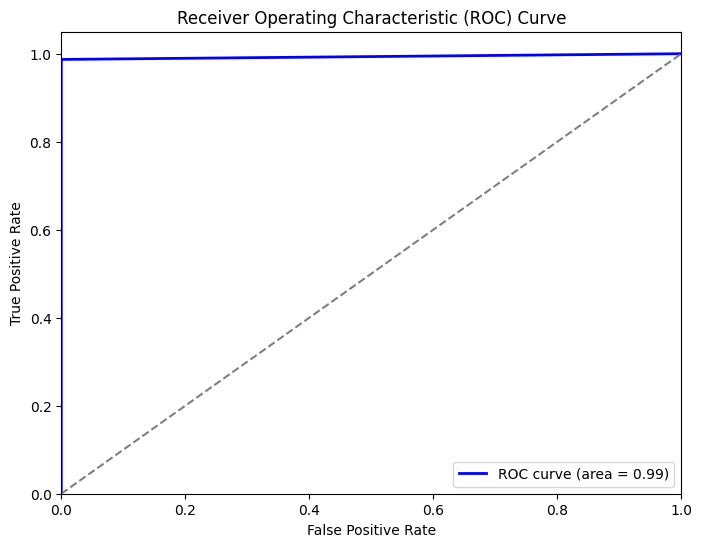

Logistic Regression
{'accuracy': 0.9913793103448276, 'precision': 1.0, 'recall': 0.987012987012987, 'f1_score': 0.9934640522875817, 'confusion_matrix': array([[39,  0],
       [ 1, 76]])}


In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# # Linear Regression
# linear_model = LinearRegression()
# train_test_model("Linear Regression", linear_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Logistic Regression
logistic_model = LogisticRegression()
train_test_model("Logistic Regression", logistic_model, X_train_scaled, y_train, X_test_scaled, y_test)

# # Ridge Regression
# ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
# train_test_model("Ridge Regression", ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

# # Lasso Regression
# lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
# train_test_model("Lasso Regression", lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

# # ElasticNet Regression
# elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust the alpha and l1_ratio parameters
# train_test_model("ElasticNet Regression", elasticnet_model, X_train_scaled, y_train, X_test_scaled, y_test)

# # Polynomial Regression
# poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree parameter
# X_train_poly = poly_features.fit_transform(X_train_scaled)
# X_test_poly = poly_features.transform(X_test_scaled)
# poly_model = LinearRegression()
# train_test_model("Polynomial Regression", poly_model, X_train_poly, y_train, X_test_poly, y_test)


Decision Trees
Random Forest
Gradient Boosting Machines (GBM)
XGBoost
LightGBM
CatBoost
Extra Trees



In [21]:
!pip install catboost

<b>Decision Trees<br>
Random Forest<br>
Gradient Boosting Machines (GBM)<br>
XGBoost<br>
LightGBM<br>
Extra Trees<br>
CatBoost<br></b>

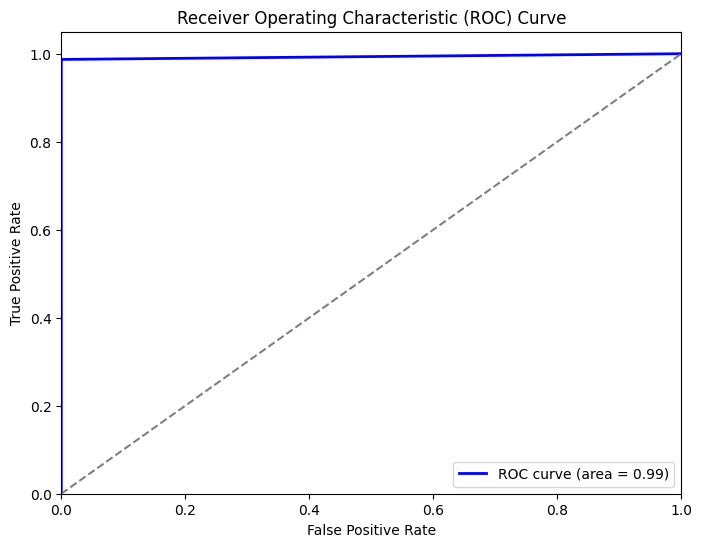

Decision Trees
{'accuracy': 0.9913793103448276, 'precision': 1.0, 'recall': 0.987012987012987, 'f1_score': 0.9934640522875817, 'confusion_matrix': array([[39,  0],
       [ 1, 76]])}


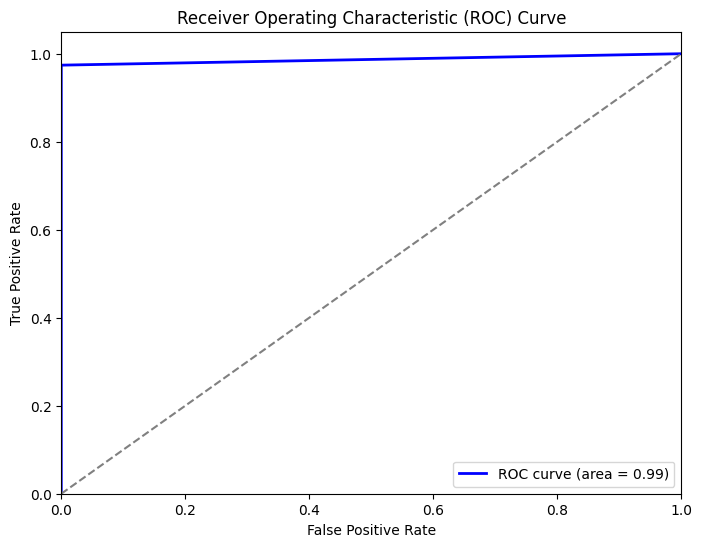

Random Forest
{'accuracy': 0.9827586206896551, 'precision': 1.0, 'recall': 0.974025974025974, 'f1_score': 0.9868421052631579, 'confusion_matrix': array([[39,  0],
       [ 2, 75]])}


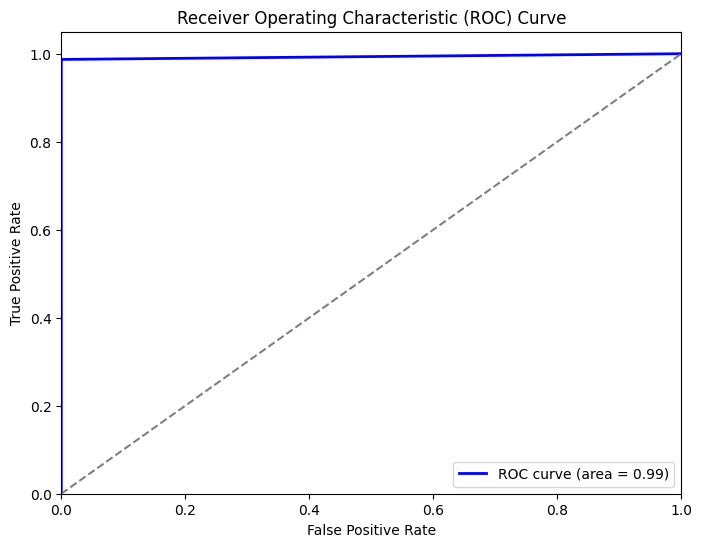

Gradient Boosting Machines (GBM)
{'accuracy': 0.9913793103448276, 'precision': 1.0, 'recall': 0.987012987012987, 'f1_score': 0.9934640522875817, 'confusion_matrix': array([[39,  0],
       [ 1, 76]])}


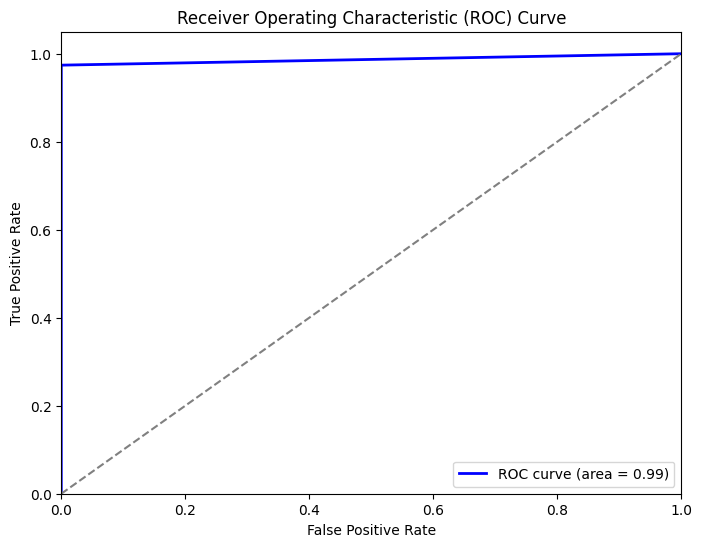

XGBoost
{'accuracy': 0.9827586206896551, 'precision': 1.0, 'recall': 0.974025974025974, 'f1_score': 0.9868421052631579, 'confusion_matrix': array([[39,  0],
       [ 2, 75]])}
[LightGBM] [Info] Number of positive: 342, number of negative: 122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 464, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737069 -> initscore=1.030790
[LightGBM] [Info] Start training from score 1.030790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

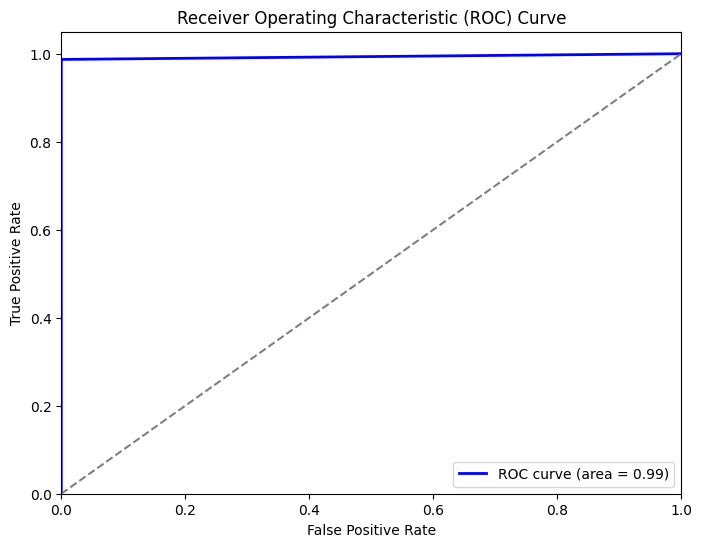

LightGBM
{'accuracy': 0.9913793103448276, 'precision': 1.0, 'recall': 0.987012987012987, 'f1_score': 0.9934640522875817, 'confusion_matrix': array([[39,  0],
       [ 1, 76]])}


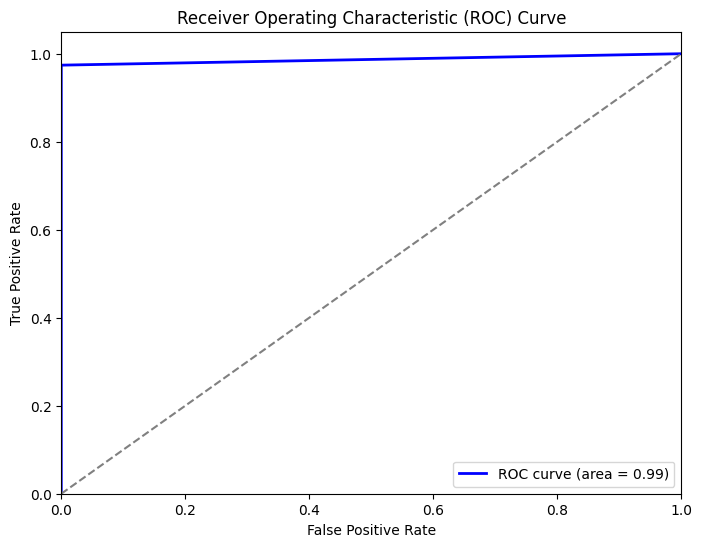

CatBoost
{'accuracy': 0.9827586206896551, 'precision': 1.0, 'recall': 0.974025974025974, 'f1_score': 0.9868421052631579, 'confusion_matrix': array([[39,  0],
       [ 2, 75]])}


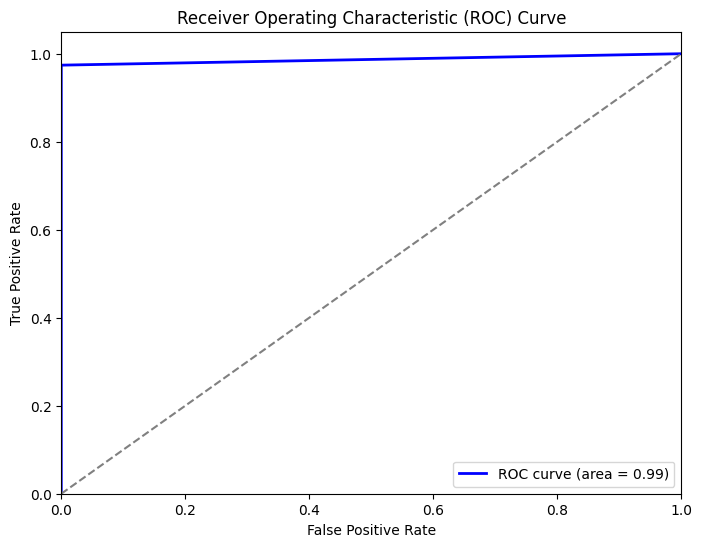

Extra Trees
{'accuracy': 0.9827586206896551, 'precision': 1.0, 'recall': 0.974025974025974, 'f1_score': 0.9868421052631579, 'confusion_matrix': array([[39,  0],
       [ 2, 75]])}


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Decision Trees
decision_tree = DecisionTreeClassifier(random_state=42)
train_test_model("Decision Trees", decision_tree, X_train_scaled, y_train, X_test_scaled, y_test)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
train_test_model("Random Forest", random_forest, X_train_scaled, y_train, X_test_scaled, y_test)

# Gradient Boosting Machines (GBM)
gbm = GradientBoostingClassifier(random_state=42)
train_test_model("Gradient Boosting Machines (GBM)", gbm, X_train_scaled, y_train, X_test_scaled, y_test)

# XGBoost
xgboost = xgb.XGBClassifier(random_state=42)
train_test_model("XGBoost", xgboost, X_train_scaled, y_train, X_test_scaled, y_test)

# LightGBM
lightgbm = lgb.LGBMClassifier(random_state=42)
train_test_model("LightGBM", lightgbm, X_train_scaled, y_train, X_test_scaled, y_test)

# CatBoost
catboost = cb.CatBoostClassifier(random_state=42, verbose=0)
train_test_model("CatBoost", catboost, X_train_scaled, y_train, X_test_scaled, y_test)

# Extra Trees
extra_trees = ExtraTreesClassifier(random_state=42)
train_test_model("Extra Trees", extra_trees, X_train_scaled, y_train, X_test_scaled, y_test)


<b>SVM for Classification
SVM for Regression</b>

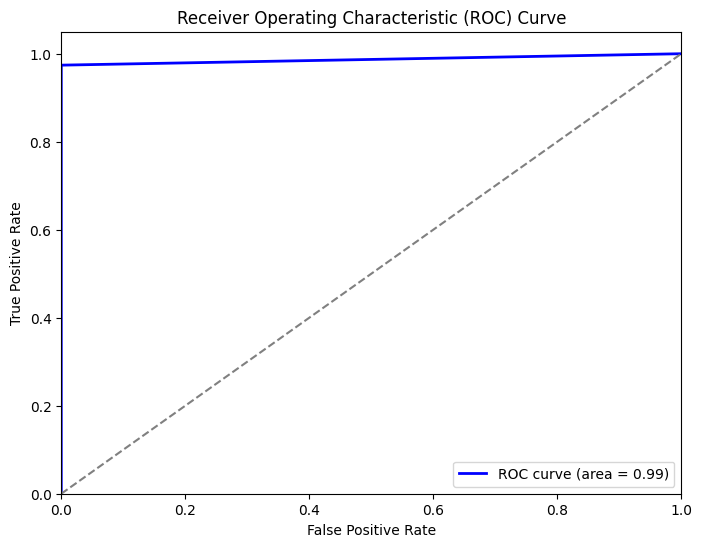

SVM_Classification
{'accuracy': 0.9827586206896551, 'precision': 1.0, 'recall': 0.974025974025974, 'f1_score': 0.9868421052631579, 'confusion_matrix': array([[39,  0],
       [ 2, 75]])}


In [23]:
from sklearn.svm import SVC, SVR

# SVM for Classification
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
train_test_model("SVM_Classification", svm_classifier, X_train_scaled, y_train, X_test_scaled, y_test)

# # SVM for Regression
# svm_regressor = SVR(C=1.0, kernel='rbf', gamma='scale')
# train_test_model("SVM_Regression", svm_regressor, X_train_scaled, y_train, X_test_scaled, y_test)


**k-Nearest Neighbors (kNN)<br>
Radius Neighbors Classifier**

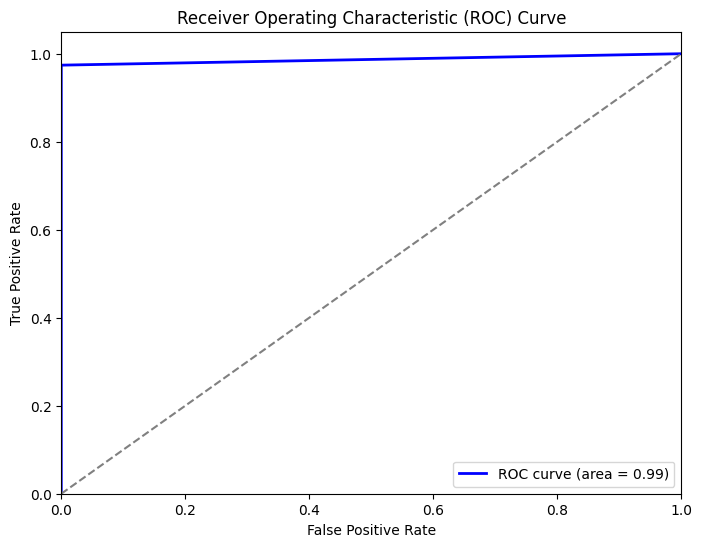

kNN
{'accuracy': 0.9827586206896551, 'precision': 1.0, 'recall': 0.974025974025974, 'f1_score': 0.9868421052631579, 'confusion_matrix': array([[39,  0],
       [ 2, 75]])}


In [24]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# Define kNN model with adjustable parameters
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Define Radius Neighbors Classifier model with adjustable parameters
radius_model = RadiusNeighborsClassifier(radius=1.0)  # You can adjust the radius parameter

# Call train_test_model function to train, test, and evaluate each model
train_test_model("kNN", knn_model, X_train_scaled, y_train, X_test_scaled, y_test)
# train_test_model("Radius Neighbors Classifier", radius_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Results will be saved in the Results dictionary


**Gaussian Naive Bayes<br>
Bernoulli Naive Bayes**

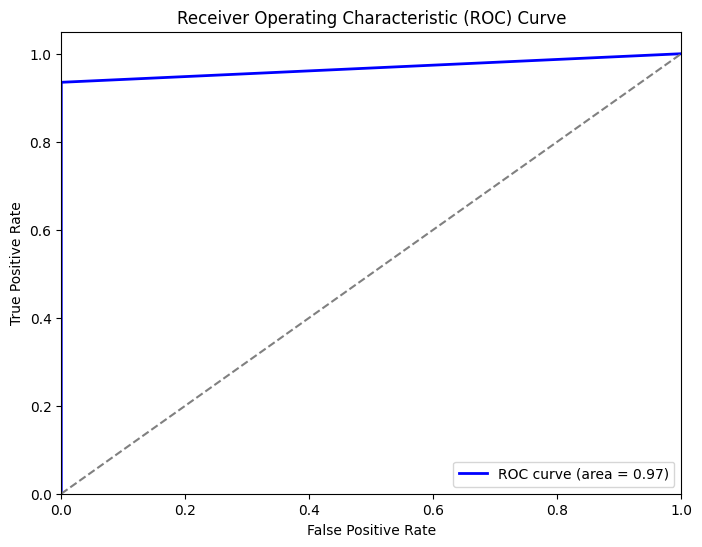

GaussianNB
{'accuracy': 0.9568965517241379, 'precision': 1.0, 'recall': 0.935064935064935, 'f1_score': 0.9664429530201343, 'confusion_matrix': array([[39,  0],
       [ 5, 72]])}


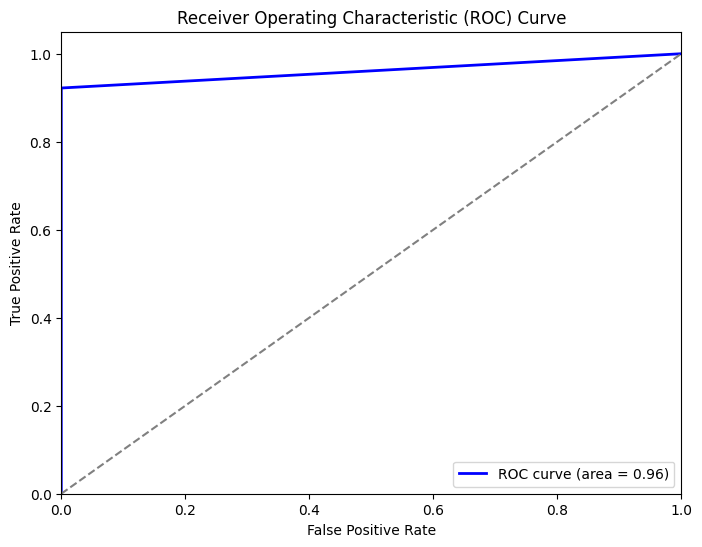

BernoulliNB
{'accuracy': 0.9482758620689655, 'precision': 1.0, 'recall': 0.922077922077922, 'f1_score': 0.9594594594594594, 'confusion_matrix': array([[39,  0],
       [ 6, 71]])}


In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Gaussian Naive Bayes
gnb = GaussianNB()

# Multinomial Naive Bayes
mnb = MultinomialNB()

# Bernoulli Naive Bayes
bnb = BernoulliNB()

# Function calls for training, testing, and evaluating each model
train_test_model("GaussianNB", gnb, X_train_scaled, y_train, X_test_scaled, y_test)
# train_test_model("MultinomialNB", mnb, X_train_scaled, y_train, X_test_scaled, y_test)
train_test_model("BernoulliNB", bnb, X_train_scaled, y_train, X_test_scaled, y_test)


In [26]:
X_train_scaled

array([[-1.69934531, -1.39738353,  1.95860567,  1.01472513, -0.22214655],
       [ 0.65896518,  0.65419713, -0.58439583, -0.52982595, -0.22291965],
       [ 0.61510442,  0.60857418, -0.5835697 , -0.52479084, -0.22304955],
       ...,
       [ 0.73873673,  0.74330577, -0.58619728, -0.54080473, -0.2224127 ],
       [ 0.60224303,  0.59683521, -0.58320397, -0.52256169, -0.22274538],
       [-1.61592518, -1.59185502,  1.40406716,  2.59917145, -0.22256161]])

In [27]:
X_test_scaled

array([[-0.97102334, -2.26083717, -0.57500168, -0.48317336,  3.28025122],
       [ 0.62806137,  0.62272604, -0.58389484, -0.52677252, -0.22219091],
       [-1.6620966 , -1.49561572,  1.68013403,  1.7327349 , -0.22251092],
       [ 0.71331077,  0.71196258, -0.58584568, -0.53866202, -0.22256478],
       [ 0.63393178,  0.63155988, -0.5840432 , -0.52767674, -0.22305589],
       [ 0.64542132,  0.64395663, -0.58403778, -0.52764372, -0.22312243],
       [ 0.69892976,  0.6990548 , -0.58554484, -0.5368286 , -0.22264399],
       [ 0.66908394,  0.66767513, -0.58486817, -0.53270471, -0.22252042],
       [ 0.59993022,  0.59361566, -0.58296333, -0.52109498, -0.2228341 ],
       [ 0.57208327,  0.56163594, -0.58190274, -0.51463033, -0.22305906],
       [ 0.26869378,  0.23562533, -0.56871432, -0.43421579, -0.22239685],
       [ 0.70075653,  0.70074424, -0.58557804, -0.53703093, -0.22245706],
       [-1.21776459, -1.05997386,  1.2458687 ,  0.51570407, -0.22305906],
       [ 0.672001  ,  0.67009782, -0.5